In [1]:
import os

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\moham\Desktop\data science tutorial\notebook


In [3]:
BASE_DIR=os.path.dirname(cwd)
DATA_DIR=os.path.join(BASE_DIR,'data')

In [4]:
os.listdir(DATA_DIR)

['classification',
 'creditcard.csv',
 'diabetes_data.csv',
 'hypertension_data.csv',
 'iris.csv',
 'Parkinsson disease.csv',
 'stroke_data.csv',
 'twitter_training.csv',
 'YouTubeDataset_withChannelElapsed.csv']

In [5]:
my_data=os.path.join(DATA_DIR, 'Parkinsson disease.csv')
print(os.path.exists(my_data))

True


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [7]:

df=pd.read_csv(my_data)

In [8]:
df.shape

(195, 24)

In [9]:
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [10]:
df.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [11]:
features=df.drop(['name','status'],axis=1)

In [12]:
features.head(n=10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [13]:
target =df.loc[:,'status']

In [14]:
scaler=MinMaxScaler((-1,1))
features_c=scaler.fit_transform(features)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(features_c,target,test_size=0.2,random_state=10)

In [16]:
model = RandomForestClassifier(random_state=2)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=2)

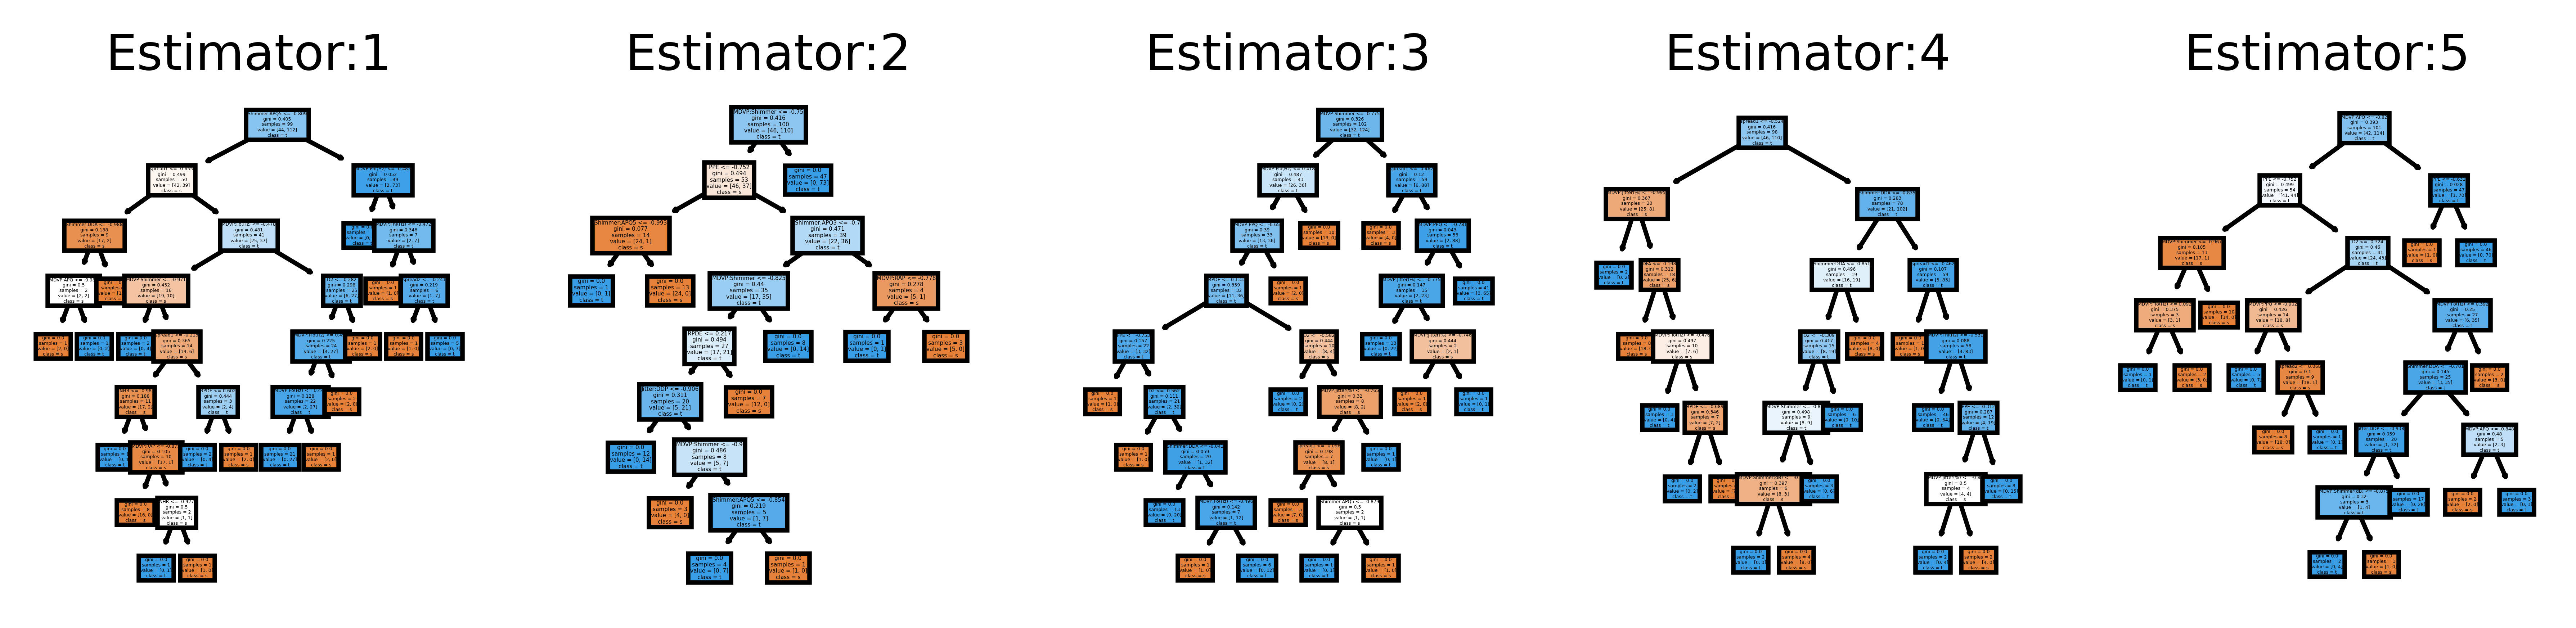

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(10,2),dpi=900)
for index in range(0,5):
    tree.plot_tree(model.estimators_[index],feature_names=features.columns,
    class_names='status',filled=True,ax=axes[index])
    axes[index].set_title('Estimator:' + str(index+1),fontsize=11)
fig.savefig('random forest tree.png')

In [18]:
y_pred=model.predict(X_test)

In [19]:
print('Accuracy: ',accuracy_score(Y_test,y_pred))
print('mean_absolute_error: ',mean_absolute_error(Y_test,y_pred))
print('mean_squared_error: ',np.sqrt(mean_squared_error(Y_test,y_pred)))

Accuracy:  0.9743589743589743
mean_absolute_error:  0.02564102564102564
mean_squared_error:  0.16012815380508713


In [20]:
in_data=np.asarray(tuple(map(float,input().rstrip().split(","))))
in_data_re=in_data.reshape(1,-1)
in_data_scs=scaler.transform(in_data_re)


148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710


C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
print("parkinson's disease conformed" if model.predict(in_data_scs)else"no disease")

parkinson's disease conformed
